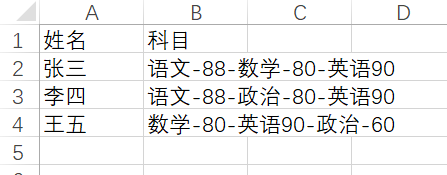

In [1]:
#列表汇总总文件
from IPython.display import Image
Image(filename="Pict/1-1.png",width=300,height=300)
#拆分、求和

In [2]:
import openpyxl
wb=openpyxl.load_workbook("data/01_grade0.xlsx")#读取工作簿
ws=wb["成绩"]#读取表
rng=ws[str(ws.min_row+1):str(ws.max_row)]#动态获取单元格区域 ps 静态获取ws[2:4]第二行到第四行
print([[c.value for c in row] for row in rng])

[['张三', '语文-88-数学-80-英语-70'], ['李四', '语文-88-政治-80-英语-90'], ['王五', '数学-80-英语-90-政治-60']]


In [3]:
#计算总分法一
sl=[]
for rn in rng:
    Sum=0
    print(rn)
    st=rn[1].value
    l0=st.split("-")
    print("l0:",l0)
    l=st.split("-")[1::2]
    print("l:",l)
    for s in l:
        Sum+=int(s)
    print(Sum)
    sl.append([rn[0].value,Sum])
print(sl)

#创建新表保存结果
ws1=wb.create_sheet(title='总分')
ws1.append(["姓名","总分"])#写入表头
for s in sl:
    ws1.append(s)
wb.save('data/01_test1.xlsx')

(<Cell '成绩'.A2>, <Cell '成绩'.B2>)
l0: ['语文', '88', '数学', '80', '英语', '70']
l: ['88', '80', '70']
238
(<Cell '成绩'.A3>, <Cell '成绩'.B3>)
l0: ['语文', '88', '政治', '80', '英语', '90']
l: ['88', '80', '90']
258
(<Cell '成绩'.A4>, <Cell '成绩'.B4>)
l0: ['数学', '80', '英语', '90', '政治', '60']
l: ['80', '90', '60']
230
[['张三', 238], ['李四', 258], ['王五', 230]]


In [4]:
#整理表格数据并且计算总分
#获得各科成绩
ws2=wb.create_sheet(title='各课成绩')
K=[]
DIC={}
for rn in rng:
    dic={}
    st=rn[1].value
    l=st.split("-")
    i=0
    keyl=[]
    while i<len(l):
        dic.update({l[i]:int(l[i+1])})
        i+=2
        keyl=list(dic.keys())
        for key in keyl:
            K.append(key)
    DIC.update({rn[0].value:dic})
K=list(set(K))
K.insert(0,'姓名')#在指定位置插入元素
print(DIC,K)
ws2.append(K)
for names in list(DIC.keys()):
    for i in K:
        if i not in DIC[names].keys():
            DIC[names].update({i:0})
    ws2.append([names,DIC[names][K[1]],DIC[names][K[2]],DIC[names][K[3]],DIC[names][K[4]]])
    

#计算总分
ws3=wb.create_sheet(title='总分1')
rng1=ws2[str(ws.min_row+1):str(ws.max_row)]
l_a=[[c.value for c in row] [1:]for row in rng1]
rngs1=[[rn[0].value,sum([c.value for c in rn][1:])]for rn in rng1]#从每行第二个cell开始
ws3.append(['姓名','总分数'])
for line in rngs1:
    ws3.append(line)

wb.save("data/01_test2.xlsx")


{'张三': {'语文': 88, '数学': 80, '英语': 70}, '李四': {'语文': 88, '政治': 80, '英语': 90}, '王五': {'数学': 80, '英语': 90, '政治': 60}} ['姓名', '数学', '英语', '语文', '政治']


6
